<a href="https://colab.research.google.com/github/coyolxahuqui/Tareas-UIC/blob/main/RNC_dropout.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.regularizers import l1
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train.reshape(-1, 28, 28, 1) / 255.0, x_test.reshape(-1, 28, 28, 1) / 255.0
y_train, y_test = tf.keras.utils.to_categorical(y_train), tf.keras.utils.to_categorical(y_test)

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
#modelo
def build_model(dropout_rate=0.0, dropout_layer=None):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1), kernel_regularizer=l1(0.0001)),
        MaxPooling2D((2, 2)),
        Dropout(dropout_rate) if dropout_layer == 1 else tf.keras.layers.Layer(),
        Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l1(0.0001)),
        MaxPooling2D((2, 2)),
        Dropout(dropout_rate) if dropout_layer == 2 else tf.keras.layers.Layer(),
        Flatten(),
        Dense(128, activation='relu', kernel_regularizer=l1(0.0001)),
        Dropout(dropout_rate) if dropout_layer == 3 else tf.keras.layers.Layer(),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [4]:
# entrenamiento del modelo
dropout_configs = {
    'No Dropout': (0.0, None),
    'Dropout after 1st MaxPooling': (0.5, 1),
    'Dropout after 2nd MaxPooling': (0.5, 2),
    'Dropout after Dense': (0.5, 3)
}
history_dict = {}

for name, (rate, layer) in dropout_configs.items():
    print(f"Training with configuration: {name}")
    model = build_model(dropout_rate=rate, dropout_layer=layer)
    history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test), verbose=2)
    history_dict[name] = history

Training with configuration: No Dropout
Epoch 1/10
1875/1875 - 57s - loss: 0.3970 - accuracy: 0.9550 - val_loss: 0.2240 - val_accuracy: 0.9747 - 57s/epoch - 30ms/step
Epoch 2/10
1875/1875 - 52s - loss: 0.1858 - accuracy: 0.9789 - val_loss: 0.1595 - val_accuracy: 0.9804 - 52s/epoch - 28ms/step
Epoch 3/10
1875/1875 - 53s - loss: 0.1432 - accuracy: 0.9832 - val_loss: 0.1330 - val_accuracy: 0.9833 - 53s/epoch - 28ms/step
Epoch 4/10
1875/1875 - 53s - loss: 0.1231 - accuracy: 0.9854 - val_loss: 0.1292 - val_accuracy: 0.9828 - 53s/epoch - 28ms/step
Epoch 5/10
1875/1875 - 55s - loss: 0.1140 - accuracy: 0.9870 - val_loss: 0.1071 - val_accuracy: 0.9872 - 55s/epoch - 29ms/step
Epoch 6/10
1875/1875 - 53s - loss: 0.1083 - accuracy: 0.9875 - val_loss: 0.1108 - val_accuracy: 0.9858 - 53s/epoch - 28ms/step
Epoch 7/10
1875/1875 - 55s - loss: 0.1038 - accuracy: 0.9884 - val_loss: 0.0994 - val_accuracy: 0.9883 - 55s/epoch - 30ms/step
Epoch 8/10
1875/1875 - 58s - loss: 0.0998 - accuracy: 0.9885 - val_loss

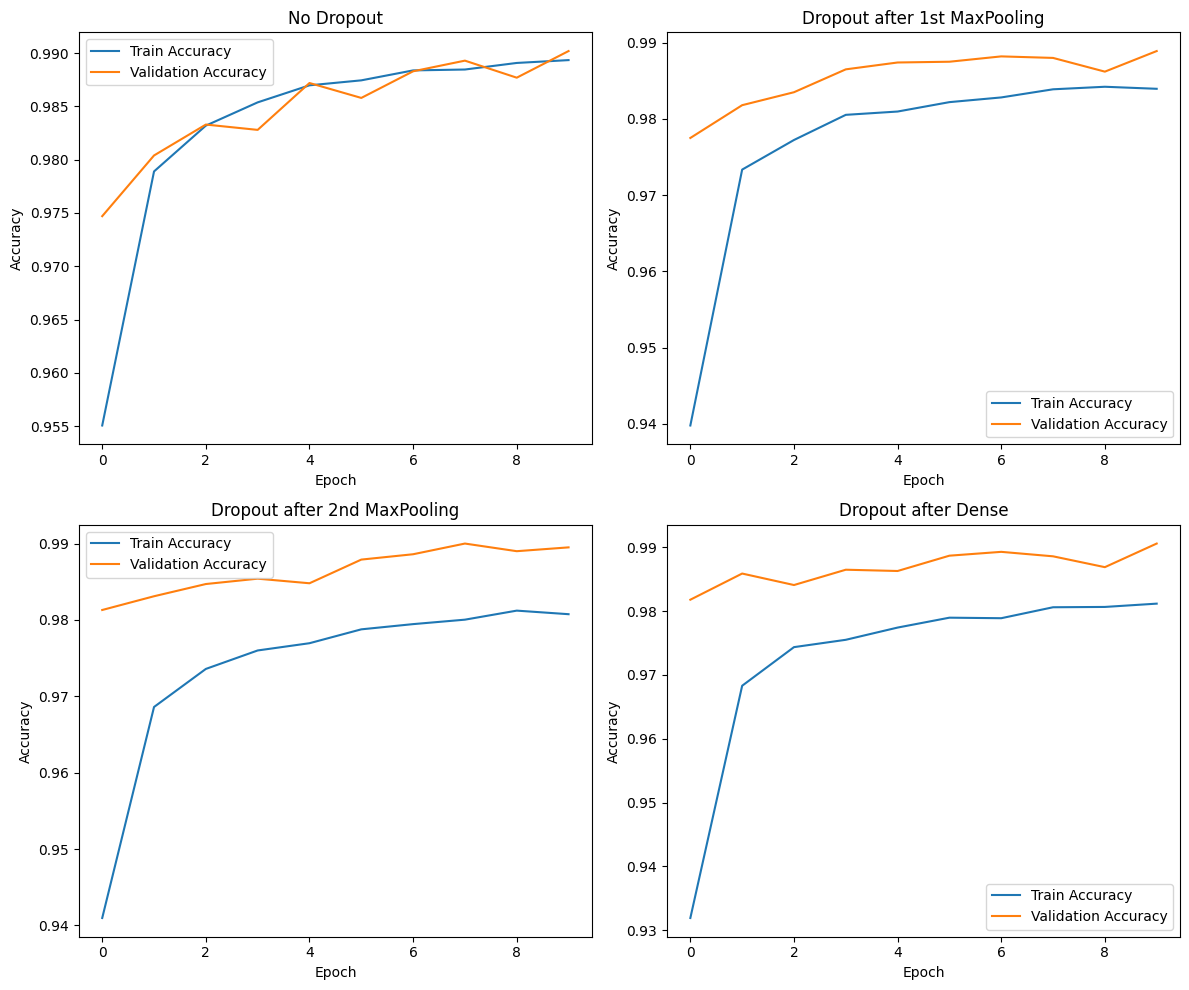

In [5]:
# Visualización de métricas
plt.figure(figsize=(12, 10))
for i, (name, history) in enumerate(history_dict.items()):
    plt.subplot(2, 2, i+1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(name)
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

plt.tight_layout()
plt.show()


In [6]:
# Tabla de métricas
metrics_dict = {}
for name, history in history_dict.items():
    metrics_dict[name] = {
        'Train Accuracy': history.history['accuracy'][-1],
        'Validation Accuracy': history.history['val_accuracy'][-1],
        'Train Loss': history.history['loss'][-1],
        'Validation Loss': history.history['val_loss'][-1]
    }

metrics_df = pd.DataFrame(metrics_dict).T
print(metrics_df)

                              Train Accuracy  Validation Accuracy  Train Loss  \
No Dropout                          0.989350               0.9902    0.091814   
Dropout after 1st MaxPooling        0.983950               0.9889    0.125809   
Dropout after 2nd MaxPooling        0.980750               0.9895    0.185502   
Dropout after Dense                 0.981183               0.9906    0.165351   

                              Validation Loss  
No Dropout                           0.088938  
Dropout after 1st MaxPooling         0.109593  
Dropout after 2nd MaxPooling         0.153930  
Dropout after Dense                  0.130561  
